In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('cleaned.csv')
data.head()

,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,0.44,0.642857,0.75,4.5,4.5,9.65,1.0,0.92
1,1,0.44,0.535714,0.75,4.0,4.5,8.87,1.0,0.76
2,2,0.52,0.428571,0.50,3.0,3.5,8.00,1.0,0.72
3,3,0.64,0.642857,0.50,3.5,2.5,8.67,1.0,0.80
4,4,0.48,0.392857,0.25,2.0,3.0,8.21,0.0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         400 non-null    int64  
 1   GRE Score          400 non-null    float64
 2   TOEFL Score        400 non-null    float64
 3   University Rating  400 non-null    float64
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    float64
 8   Chance of Admit    400 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 28.2 KB


In [4]:
data.isna().sum()

Unnamed: 0           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
corr_matr = data.corr()
corr_matr.columns

Index(['Unnamed: 0', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
corr_matr['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.874405
GRE Score            0.790177
TOEFL Score          0.789904
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Unnamed: 0           0.042336
Name: Chance of Admit , dtype: float64

In [7]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.44,0.642857,0.75,4.5,4.5,9.65,1.0,0.92
1,0.44,0.535714,0.75,4.0,4.5,8.87,1.0,0.76
2,0.52,0.428571,0.50,3.0,3.5,8.00,1.0,0.72
3,0.64,0.642857,0.50,3.5,2.5,8.67,1.0,0.80
4,0.48,0.392857,0.25,2.0,3.0,8.21,0.0,0.65


<AxesSubplot:>

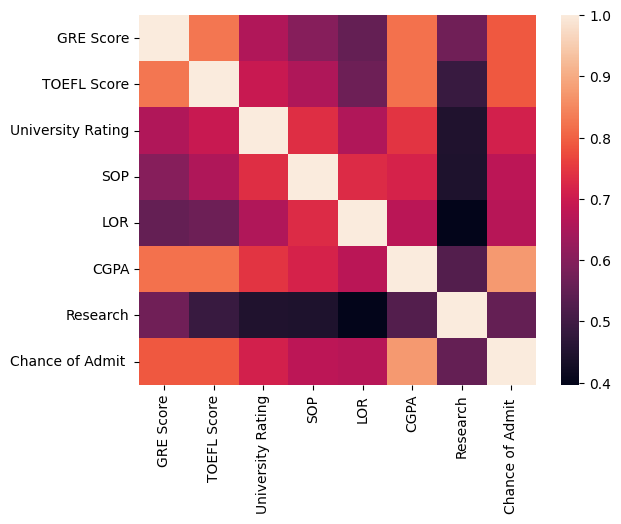

In [8]:
sns.heatmap(data.corr())

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1500x800 with 0 Axes>

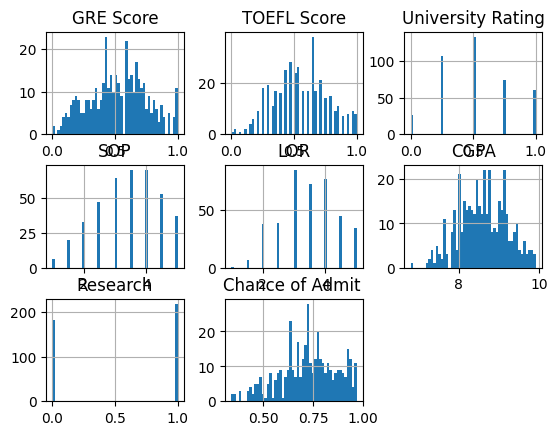

In [9]:
plt.figure(figsize=(15,8))
data.hist(bins=50)

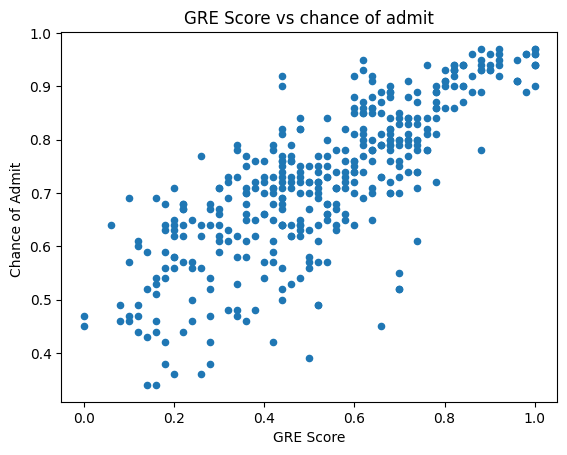

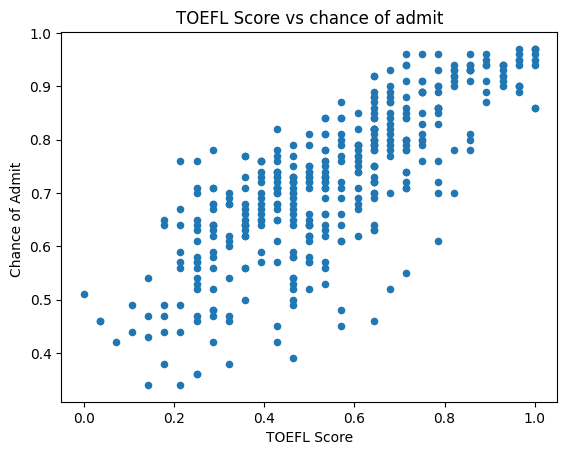

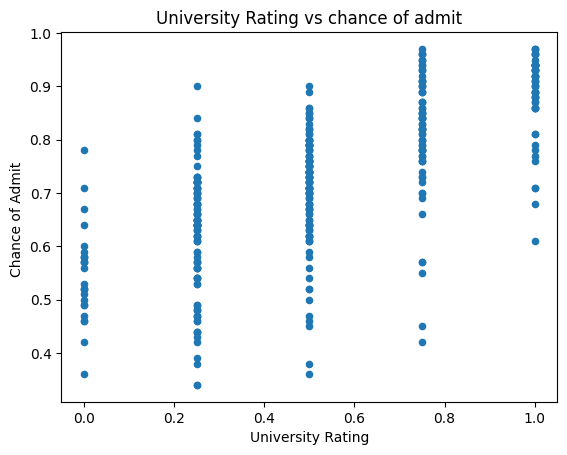

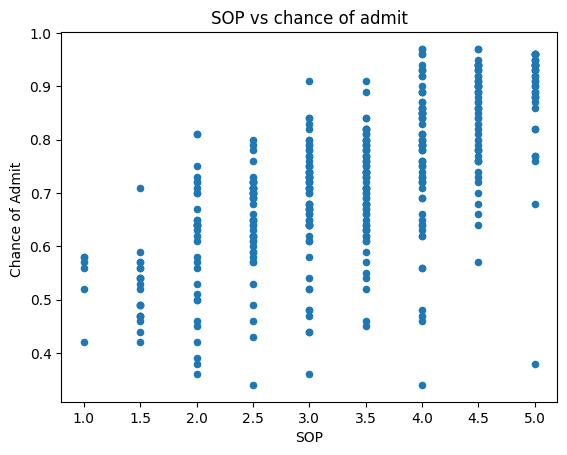

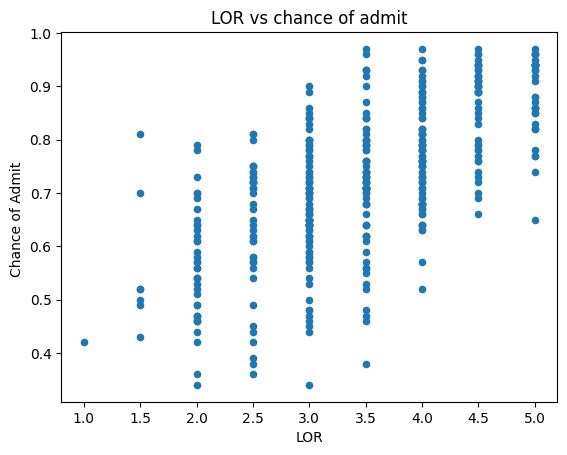

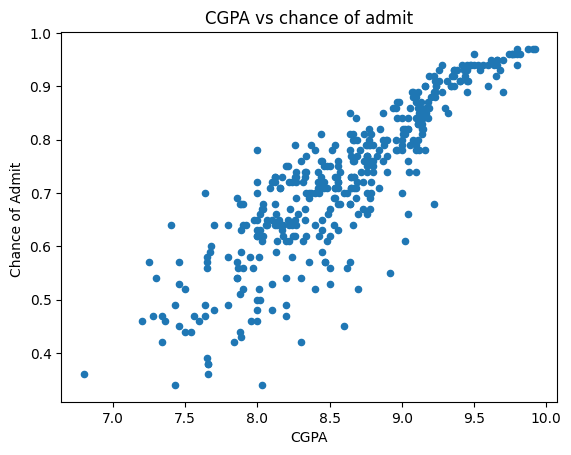

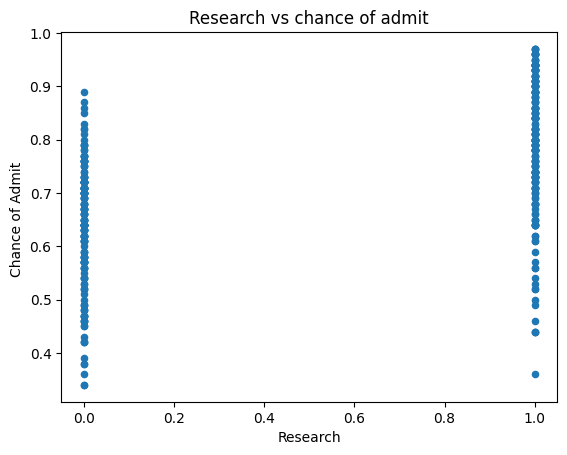

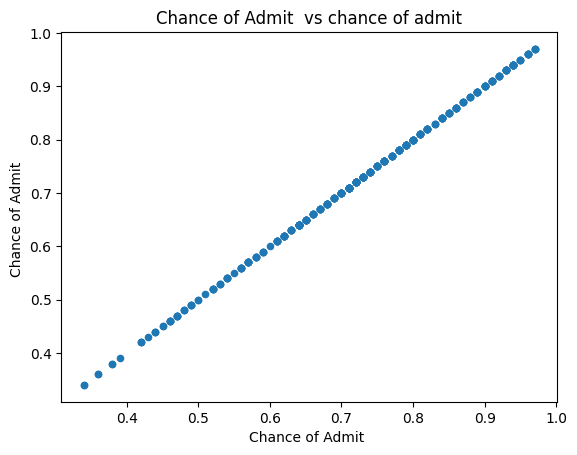

In [10]:
for col in data.columns:
    data.plot(kind='scatter',x=col,y='Chance of Admit ')
    plt.title(f'{col} vs chance of admit')

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=1)

In [12]:
sds =  StandardScaler()
# features = sds.fit_transform(data[['University Rating', 'SOP','LOR ','Research']])

In [13]:
# new_f = pca.fit_transform(features)
# data['new fea']= new_f

In [14]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.44,0.642857,0.75,4.5,4.5,9.65,1.0,0.92
1,0.44,0.535714,0.75,4.0,4.5,8.87,1.0,0.76
2,0.52,0.428571,0.50,3.0,3.5,8.00,1.0,0.72
3,0.64,0.642857,0.50,3.5,2.5,8.67,1.0,0.80
4,0.48,0.392857,0.25,2.0,3.0,8.21,0.0,0.65


In [15]:
data.corr()['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.874405
GRE Score            0.790177
TOEFL Score          0.789904
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
models = {'LinearRegression':LinearRegression(),'Ridge':Ridge(),'Lasso':Lasso(),'El':ElasticNet()
          ,'DecisionTreeRegressor':DecisionTreeRegressor(),'RandomForestRegressor':RandomForestRegressor(),
          'GradientBoostingRegressor':GradientBoostingRegressor(),'KNeighborsRegressor':KNeighborsRegressor()}

In [17]:
def training_testing(x_train, x_test, y_train, y_test):
    accuracy = []
    models_names = []
    for model_name,model in models.items():
            model.fit(x_train,y_train)
            accuracy.append(r2_score(y_test,model.predict(x_test)))
            models_names.append(model_name)
    return accuracy,models_names

def show_result(accuracy,models_names):
    for i,v in enumerate(accuracy):
        print('Accuracy of ',models_names[i],'is',v*100)
    print('The model with highest Accuracy is ',models_names[accuracy.index(max(accuracy))],max(accuracy)*100)

In [18]:
x = data.drop(columns='Chance of Admit ')
y = data['Chance of Admit ']
x = sds.fit_transform(x)
y= sds.fit_transform(y.values.reshape(-1,1))
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2,random_state=45)
x_train.shape,x_test.shape

((320, 7), (80, 7))

In [19]:
a,m=training_testing(x_train, x_test, y_train, y_test)
show_result(a,m)

Accuracy of  LinearRegression is 80.68046904923469
Accuracy of  Ridge is 80.69674302003295
Accuracy of  Lasso is -0.07451178611790343
Accuracy of  El is 46.087188255224056
Accuracy of  DecisionTreeRegressor is 55.490158664924905
Accuracy of  RandomForestRegressor is 73.50252454829665
Accuracy of  GradientBoostingRegressor is 75.66999988767309
Accuracy of  KNeighborsRegressor is 74.57486313132054
The model with highest Accuracy is  Ridge 80.69674302003295


C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_17532\4058993164.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
C:\Users\yogeswarvenkatsai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
